<a href="https://colab.research.google.com/github/Gaurav7004/Machine-Learning-Projects/blob/master/zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#files.upload()

In [0]:


import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score



In [3]:
df = pd.read_excel('zomato_train.xlsx')
dataset = df.copy()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [4]:
df.head(3)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4


In [0]:
cost_dist=df[['rates','approx_cost(for two people)','online_order']].dropna()
cost_dist['rates']=cost_dist['rates'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

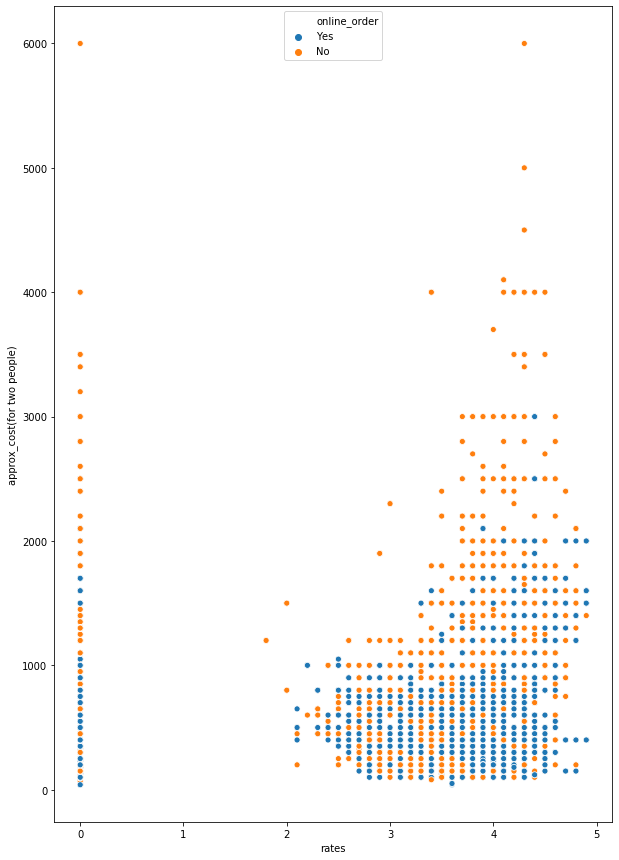

In [6]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="rates",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()

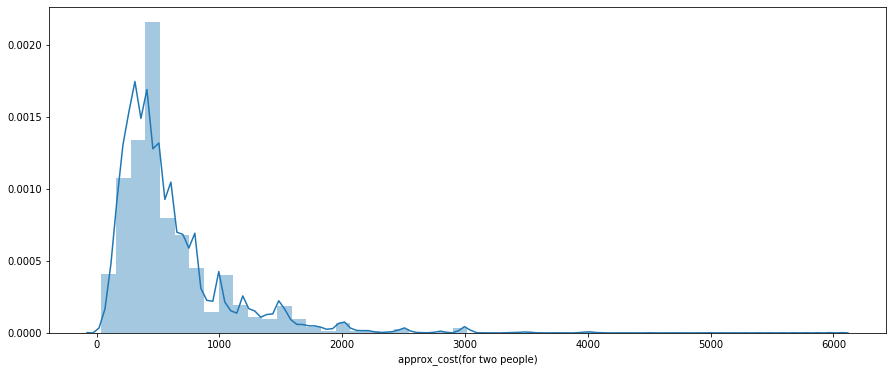

In [7]:
plt.figure(figsize=(15,6))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [10]:

df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [11]:
df.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost_for_2_people', 'reviews_list', 'menu_item',
       'listed_in_type', 'listed_in_city', 'rates'],
      dtype='object')

In [12]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
df.votes = df.votes.astype('int')
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].apply(remove_comma)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                         41373 non-null object
address                     41373 non-null object
name                        41373 non-null object
online_order                41373 non-null object
book_table                  41373 non-null object
votes                       41373 non-null int64
phone                       40402 non-null object
location                    41358 non-null object
rest_type                   41198 non-null object
dish_liked                  18901 non-null object
cuisines                    41341 non-null object
approx_cost_for_2_people    41094 non-null float64
reviews_list                41373 non-null object
menu_item                   41373 non-null object
listed_in_type              41373 non-null object
listed_in_city              41373 non-null object
rates                       33392 non-null object
dtypes: float64(1), int64(1), object(15)


In [13]:
df['rates'].unique()

array(['3.1 ', '4.6 ', '3.4 ', '4.3 ', '3.7 ', '3.0', '3.9 ', '4.1',
       '3.6', '3.8 ', '3.2', '3.6 ', nan, '3.2 ', '3.3 ', '2.9', '4.4',
       '3.9', '4.3', '3.8', '3.4', '4.2 ', '3.7', '4.1 ', '4.0 ', '3.5',
       '2.7 ', '4.5', '4.6', '4.2', '4.7', '2.9 ', '3.5 ', '2.8 ', '2.7',
       '3.1', '3.0 ', '4.4 ', '2.2', '4.5 ', '3.3', '2.6', '4.0', '2.8',
       '-', '2.5', '2.6 ', '4.7 ', '2.3', '4.8', '4.8 ', '2.3 ', '2.4 ',
       '2.5 ', '4.9 ', '4.9', '2.4', '2.1', '2.0 ', '1.8', '2.2 ', '2.1 ',
       '2.0', '1.8 '], dtype=object)

In [14]:
df['rates'].count()

33392

In [15]:
df['rates']

0        3.1 
1        4.6 
2        3.4 
3        4.3 
4        3.7 
         ... 
41368    3.8 
41369     NaN
41370    3.5 
41371    3.3 
41372     NaN
Name: rates, Length: 41373, dtype: object

In [0]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df = Encode(df.copy())



In [0]:
df['rates'] = df['rates'].fillna(df['rates'].mean())
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].fillna(df['approx_cost_for_2_people'].mean())


In [18]:
df.isna().sum()

url                         0
address                     0
name                        0
online_order                0
book_table                  0
votes                       0
phone                       0
location                    0
rest_type                   0
dish_liked                  0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
rates                       0
dtype: int64

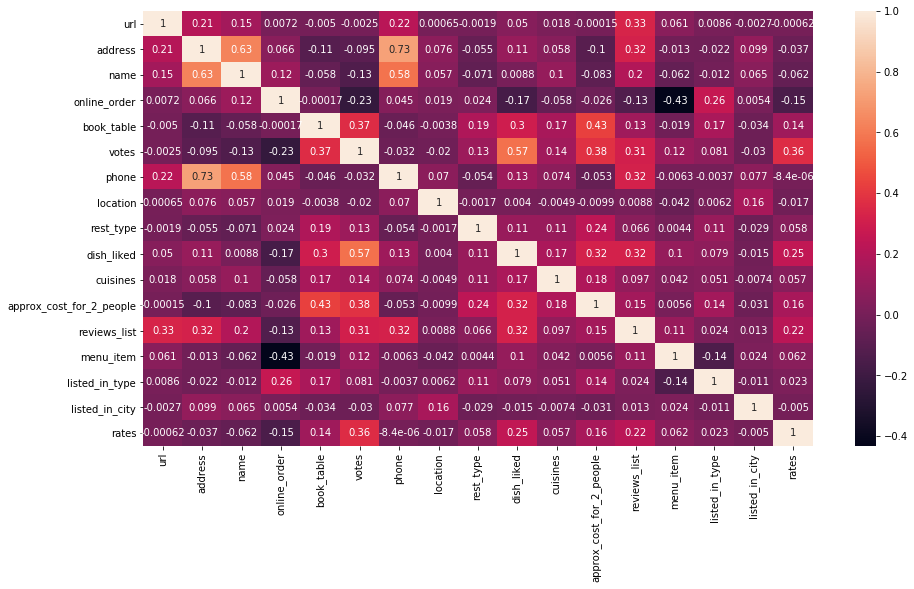

In [20]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [0]:
x = df.iloc[:,[2,3,5,6,7,8,9,11]]
y = df['rates']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [32]:
x_train.head()

,name,online_order,votes,phone,location,rest_type,dish_liked,approx_cost_for_2_people
37323,1688,0,1053,-1,12,17,3726,500.0
32648,1442,1,0,11172,24,3,-1,200.0
38221,1420,1,5,6472,16,0,-1,450.0
20679,6855,0,190,9140,30,22,3879,400.0
16604,1511,1,0,1588,28,0,-1,300.0


In [35]:
y_train.head()

37323    36
32648    -1
38221    10
20679     3
16604    -1
Name: rates, dtype: int64

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]


In [39]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.66%


In [0]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [0]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)*100

56.9591331771408

In [0]:


from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)



In [46]:
rfr.score(x_test,y_test)*100

64.75178343165575

Text(0.5, 1.0, 'NO. of restaurants in a Location')

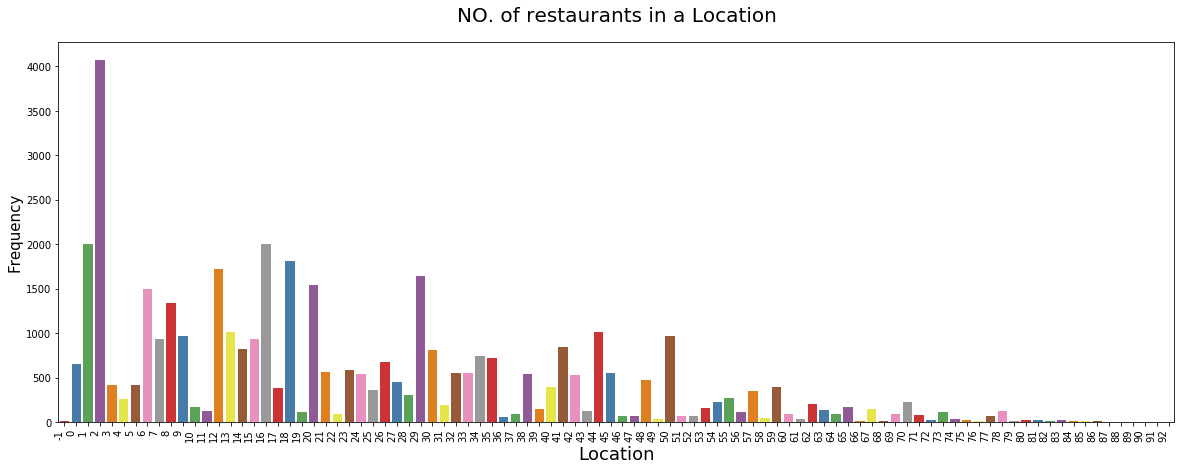

In [78]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df , palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

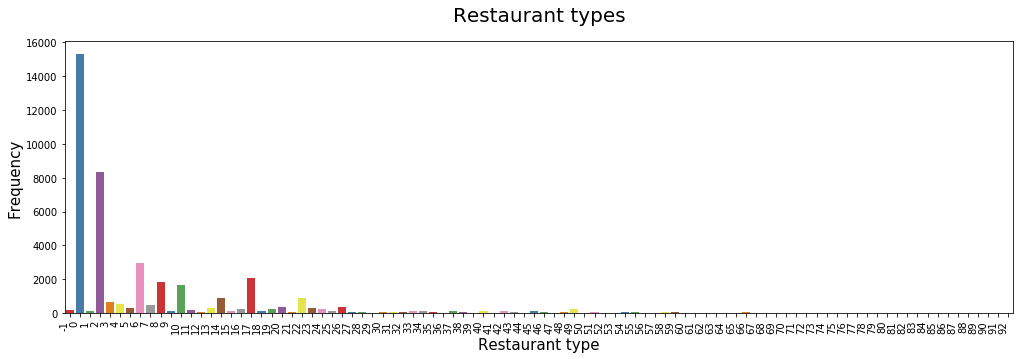

In [50]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=df , palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 1.0, 'Percentage of Restaurants according to their type')

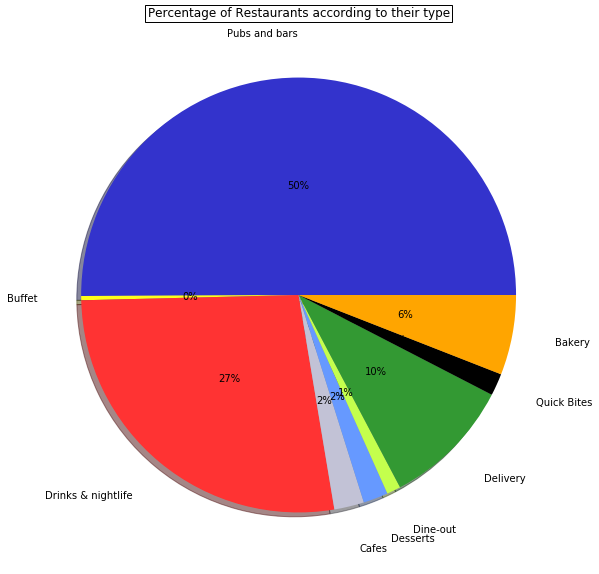

In [54]:
plt.figure(figsize=(10,10))
restaurantTypeCount=df['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6],
        restaurantTypeCount[7],
        restaurantTypeCount[8]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ','Quick Bites','Bakery']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933','black','orange']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their type", bbox={'facecolor':'2', 'pad':2})

Text(0, 0.5, 'Percentage of restaurants')

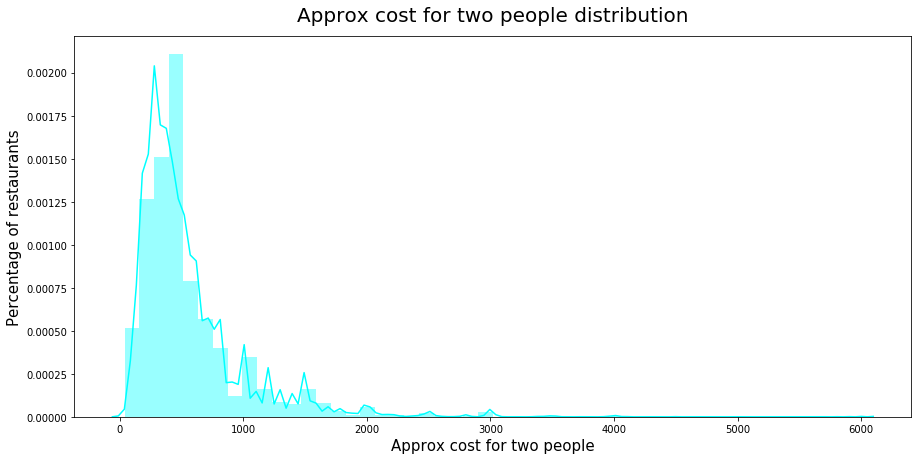

In [64]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(df['approx_cost_for_2_people'],color="aqua")
ax.set_title('Approx cost for two people distribution',size=20,pad=15)
plt.xlabel('Approx cost for two people',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

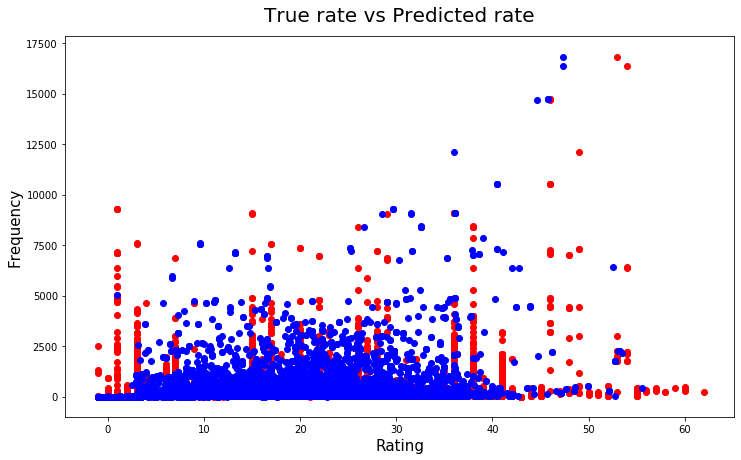

In [58]:
plt.figure(figsize=(12,7))
preds_rf = RForest.predict(x_test)
plt.scatter(y_test,x_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,x_test.iloc[:,2],color="blue")

Text(0, 0.5, 'No. of restaurants')

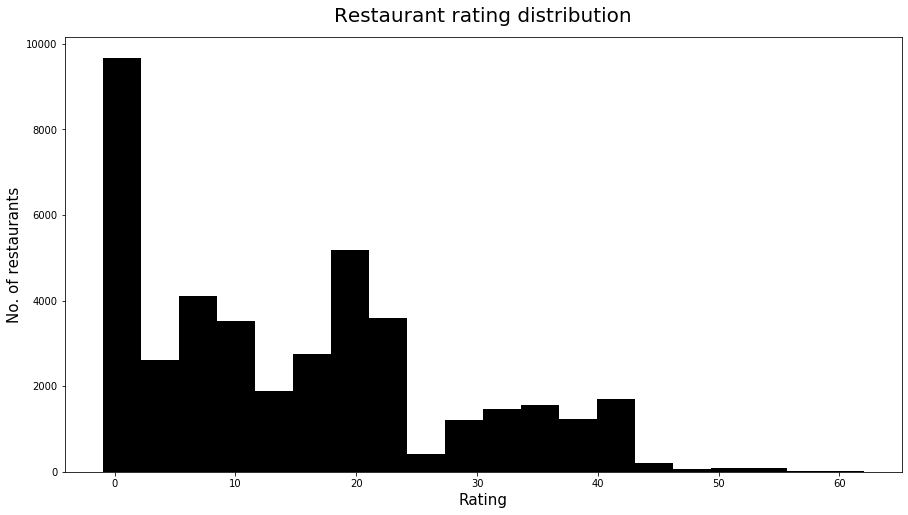

In [63]:
plt.figure(figsize=(15,8))
rating = df['rates']
plt.hist(rating,bins=20,color="black")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 15)

Text(0.5, 0, 'No. of restaurants')

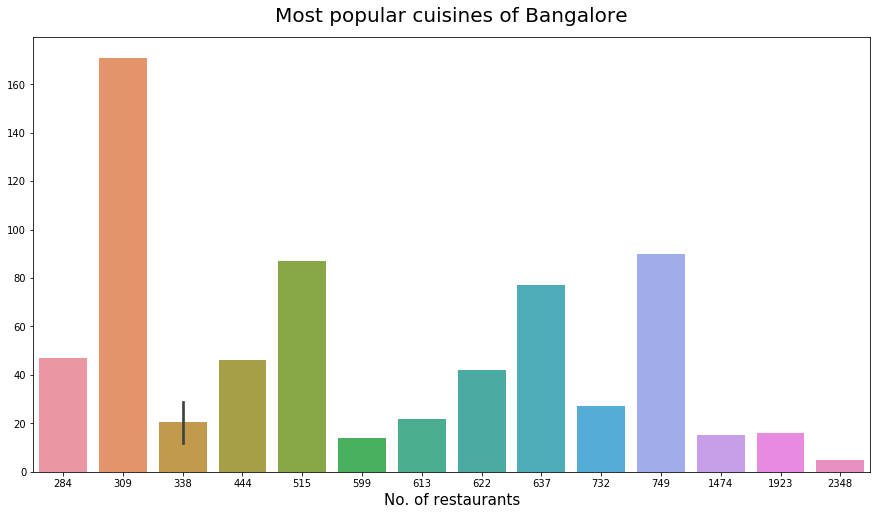

In [76]:
plt.figure(figsize=(15,8))
cuisines=df['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)